In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Hazardous Chemical Detection/Hazardous Chemical Detection.csv')
df

,Unnamed: 0,ChEMBL ID,Molecular Weight,Polar Surface Area,HBA,HBD,#Rotatable Bonds,CX LogP,Heavy Atoms,Molecular Weight (Monoisotopic),Hazardous
0,0,CHEMBL1206185,607.88,89.62,5,2,17,9.40,42.0,607.2790,0.0
1,1,CHEMBL539070,286.79,73.06,6,2,5,2.57,17.0,250.0888,1.0
2,2,CHEMBL3335528,842.80,269.57,18,5,17,3.31,60.0,842.2633,0.0
3,3,CHEMBL2419030,359.33,85.13,6,1,3,3.66,24.0,359.0551,0.0
4,4,CHEMBL4301448,465.55,105.28,6,4,10,4.41,33.0,465.1635,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1010958,1048570,CHEMBL1342212,357.83,21.26,2,1,8,3.99,18.0,267.1390,1.0
1010959,1048571,CHEMBL1342657,418.45,97.55,7,1,6,2.50,31.0,418.1641,0.0
1010960,1048572,CHEMBL4457640,535.88,101.26,5,2,5,5.66,35.0,499.1443,0.0
1010961,1048573,CHEMBL4290515,296.37,49.69,3,2,0,4.36,22.0,296.1412,1.0


In [7]:
df = df.drop('Unnamed: 0', axis=1)
df

,ChEMBL ID,Molecular Weight,Polar Surface Area,HBA,HBD,#Rotatable Bonds,CX LogP,Heavy Atoms,Molecular Weight (Monoisotopic),Hazardous
0,CHEMBL1206185,607.88,89.62,5,2,17,9.40,42.0,607.2790,0.0
1,CHEMBL539070,286.79,73.06,6,2,5,2.57,17.0,250.0888,1.0
2,CHEMBL3335528,842.80,269.57,18,5,17,3.31,60.0,842.2633,0.0
3,CHEMBL2419030,359.33,85.13,6,1,3,3.66,24.0,359.0551,0.0
4,CHEMBL4301448,465.55,105.28,6,4,10,4.41,33.0,465.1635,0.0
...,...,...,...,...,...,...,...,...,...,...
1010958,CHEMBL1342212,357.83,21.26,2,1,8,3.99,18.0,267.1390,1.0
1010959,CHEMBL1342657,418.45,97.55,7,1,6,2.50,31.0,418.1641,0.0
1010960,CHEMBL4457640,535.88,101.26,5,2,5,5.66,35.0,499.1443,0.0
1010961,CHEMBL4290515,296.37,49.69,3,2,0,4.36,22.0,296.1412,1.0


In [8]:
df.columns

Index(['ChEMBL ID', 'Molecular Weight', 'Polar Surface Area', 'HBA', 'HBD',
       '#Rotatable Bonds', 'CX LogP', 'Heavy Atoms',
       'Molecular Weight (Monoisotopic)', 'Hazardous'],
      dtype='object')

In [9]:
# Shape of the dataset
df.shape

(1010963, 10)

In [10]:
# Viewing the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010963 entries, 0 to 1010962
Data columns (total 10 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   ChEMBL ID                        1010963 non-null  object 
 1   Molecular Weight                 1010963 non-null  float64
 2   Polar Surface Area               1010963 non-null  float64
 3   HBA                              1010963 non-null  int64  
 4   HBD                              1010963 non-null  int64  
 5   #Rotatable Bonds                 1010963 non-null  int64  
 6   CX LogP                          1010963 non-null  float64
 7   Heavy Atoms                      1010963 non-null  float64
 8   Molecular Weight (Monoisotopic)  1010963 non-null  float64
 9   Hazardous                        1010963 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 77.1+ MB


In [11]:
# Let's look at the columns dtypes again
print(df.dtypes)

ChEMBL ID                           object
Molecular Weight                   float64
Polar Surface Area                 float64
HBA                                  int64
HBD                                  int64
#Rotatable Bonds                     int64
CX LogP                            float64
Heavy Atoms                        float64
Molecular Weight (Monoisotopic)    float64
Hazardous                          float64
dtype: object


In [12]:
#Remove null values
df = df.dropna()

In [13]:
#Checking Null values
df.isnull().sum()

ChEMBL ID                          0
Molecular Weight                   0
Polar Surface Area                 0
HBA                                0
HBD                                0
#Rotatable Bonds                   0
CX LogP                            0
Heavy Atoms                        0
Molecular Weight (Monoisotopic)    0
Hazardous                          0
dtype: int64

In [14]:
# Duplicate Variables
df.duplicated().sum()

0

In [15]:
# Summary for numerical data
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Molecular Weight,1010963.0,405.190450,127.854458,12.01,320.7800,388.4200,466.6100,3061.6000
Polar Surface Area,1010963.0,81.560145,45.269042,0.00,53.0800,74.4400,99.5900,580.2200
HBA,1010963.0,5.190854,2.457387,0.00,4.0000,5.0000,6.0000,32.0000
HBD,1010963.0,1.614242,1.594131,0.00,1.0000,1.0000,2.0000,25.0000
#Rotatable Bonds,1010963.0,5.825158,3.930080,0.00,3.0000,5.0000,7.0000,66.0000
CX LogP,1010963.0,3.117826,2.215841,-20.95,1.9500,3.2100,4.4300,24.8800
Heavy Atoms,1010963.0,28.224125,8.981217,1.00,22.0000,27.0000,33.0000,78.0000
Molecular Weight (Monoisotopic),1010963.0,400.751689,125.865522,12.00,318.0474,384.2202,462.1726,999.4063
Hazardous,1010963.0,0.272261,0.445124,0.00,0.0000,0.0000,1.0000,1.0000


In [16]:
df['Hazardous'].value_counts()

0.0    735717
1.0    275246
Name: Hazardous, dtype: int64

Text(0.5, 1.0, 'Hazardous Chemical Dataset Distribution')

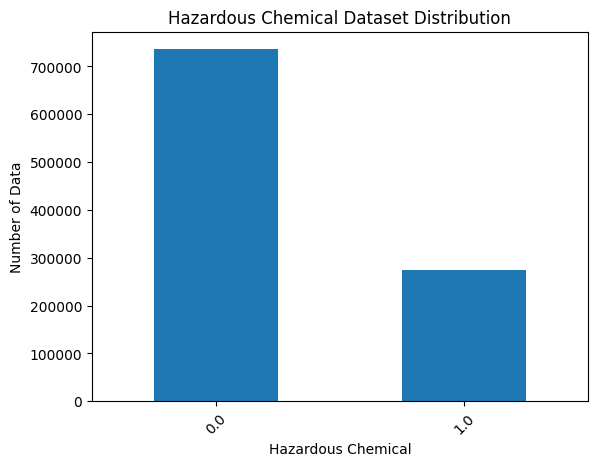

In [18]:
# Hazardous Chemical Dataset Distribution
df['Hazardous'].value_counts().plot(kind='bar')
plt.xlabel("Hazardous Chemical")
plt.ylabel("Number of Data")
plt.xticks(rotation =45)
plt.title("Hazardous Chemical Dataset Distribution")

In [26]:
#Creating Training and Testing Dataset
from sklearn.model_selection import train_test_split

df = df.drop('ChEMBL ID',axis=1)
# Creating the independent and dependent variables
X = df.drop('Hazardous',axis=1)
y = df['Hazardous']

# Creating the training and test set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
# Importing required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import  GaussianNB
from sklearn.naive_bayes import  BernoulliNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, classification_report

Linear Regression

In [30]:
# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [46]:
# Linear Regression Model Evaluation
linreg_pred = linreg.predict(X_test)
linreg_accuracy = accuracy_score(y_test, linreg_pred.round(), normalize=False)

print("\n")
print("\n\tLinear Regression Accuracy")
print("\n")

print("\n")
print(classification_report(y_test, linreg_pred.round()))




	Linear Regression Accuracy






/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.90      0.96      0.93    147342
         1.0       0.97      0.73      0.83     54851

    accuracy                           0.90    202193
   macro avg       0.62      0.56      0.59    202193
weighted avg       0.92      0.90      0.91    202193



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression

In [28]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
# Logistic Regression Model Evaluation
logreg_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print("\n")
print("\n\tLogistic Regression Accuracy:", logreg_accuracy)
print("\n")
print(classification_report(y_test, logreg_pred))




	Logistic Regression Accuracy: 0.9310905916624216


              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95    147342
         1.0       0.89      0.85      0.87     54851

    accuracy                           0.93    202193
   macro avg       0.92      0.91      0.91    202193
weighted avg       0.93      0.93      0.93    202193



**Decision Tree**

In [47]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
# Decision Tree Model Evaluation
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("\n")
print("\n\tDecision Tree Accuracy:", dt_accuracy)
print("\n")
print(classification_report(y_test, dt_pred))




	Decision Tree Accuracy: 1.0


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    147342
         1.0       1.00      1.00      1.00     54851

    accuracy                           1.00    202193
   macro avg       1.00      1.00      1.00    202193
weighted avg       1.00      1.00      1.00    202193



**Random Forest**

In [49]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
# Random Forest Model Evaluation
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("\n")
print("\n\tRandom Forest Accuracy:",rf_accuracy)
print("\n")
print(classification_report(y_test, rf_pred))




	Random Forest Accuracy: 1.0


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    147342
         1.0       1.00      1.00      1.00     54851

    accuracy                           1.00    202193
   macro avg       1.00      1.00      1.00    202193
weighted avg       1.00      1.00      1.00    202193



**KNN Regressor**

In [52]:
# KNN Regressor
knn = KNeighborsRegressor(n_neighbors = 100)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

In [58]:
# KNN Regressor Model Evaluation
from sklearn.metrics import mean_squared_error

knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test,knn_pred.round())
print("\n")
print("\n\tKNN Accuracy:",knn_accuracy)
print("\n")
#print(classification_report(y_test, knn_pred.round()))





	KNN Accuracy: 0.9985657268055769




**Naive Bayes**

Gaussian Naive Bayes

In [59]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [60]:
# Gaussian Naive Bayes Model Evaluation
gnb_pred = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test,gnb_pred)
print("\n")
print("\n\tGaussian Naive Bayes Accuracy:",gnb_accuracy)
print("\n")
print(classification_report(y_test, gnb_pred))




	Gaussian Naive Bayes Accuracy: 0.9075388366560663


              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93    147342
         1.0       0.76      0.96      0.85     54851

    accuracy                           0.91    202193
   macro avg       0.87      0.92      0.89    202193
weighted avg       0.92      0.91      0.91    202193



Bernoulli Naive Bayes

In [61]:
# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

In [62]:
# Bernoulli Naive Bayes Model Evaluation
bnb_pred = bnb.predict(X_test)
bnb_accuracy = accuracy_score(y_test,bnb_pred)
print("\n")
print("\n\t Bernoulli Naive Bayes Accuracy:",bnb_accuracy)
print("\n")
print(classification_report(y_test, bnb_pred))




	 Bernoulli Naive Bayes Accuracy: 0.73918978401824


              precision    recall  f1-score   support

         0.0       0.74      0.99      0.85    147342
         1.0       0.76      0.06      0.11     54851

    accuracy                           0.74    202193
   macro avg       0.75      0.53      0.48    202193
weighted avg       0.74      0.74      0.65    202193



**Ada Boost**


In [63]:
# Ada Boost
adab = AdaBoostClassifier(n_estimators =100, learning_rate = 1)
adab.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [64]:
# Ada Boost Model Evaluation
adab_pred = adab.predict(X_test)
adab_accuracy = accuracy_score(y_test,adab_pred)
print("\n")
print("\n\t Ada Boost Accuracy:",adab_accuracy)
print("\n")
print(classification_report(y_test, adab_pred))




	 Ada Boost Accuracy: 1.0


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    147342
         1.0       1.00      1.00      1.00     54851

    accuracy                           1.00    202193
   macro avg       1.00      1.00      1.00    202193
weighted avg       1.00      1.00      1.00    202193



Neural Network

Feedforward neural network(FNN) AKA Multi-Layer Perceptron (MLP)

In [65]:
import tensorflow as tf



# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [66]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
22747/22747 [==============================] - 63s 3ms/step - loss: 0.0167 - accuracy: 0.9939 - val_loss: 0.0074 - val_accuracy: 0.9983
Epoch 2/20
22747/22747 [==============================] - 62s 3ms/step - loss: 0.0092 - accuracy: 0.9963 - val_loss: 0.0069 - val_accuracy: 0.9980
Epoch 3/20
22747/22747 [==============================] - 61s 3ms/step - loss: 0.0083 - accuracy: 0.9967 - val_loss: 0.0088 - val_accuracy: 0.9966
Epoch 4/20
22747/22747 [==============================] - 62s 3ms/step - loss: 0.0077 - accuracy: 0.9969 - val_loss: 0.0082 - val_accuracy: 0.9964
Epoch 5/20
22747/22747 [==============================] - 62s 3ms/step - loss: 0.0072 - accuracy: 0.9972 - val_loss: 0.0120 - val_accuracy: 0.9956
Epoch 6/20
22747/22747 [==============================] - 64s 3ms/step - loss: 0.0068 - accuracy: 0.9972 - val_loss: 0.0063 - val_accuracy: 0.9978
Epoch 7/20
22747/22747 [==============================] - 67s 3ms/step - loss: 0.0065 - accuracy: 0.9973 - val_loss: 0

In [67]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int)
print("\n")
print(classification_report(y_test, y_pred_classes))


6319/6319 [==============================] - 11s 2ms/step


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    147342
         1.0       1.00      1.00      1.00     54851

    accuracy                           1.00    202193
   macro avg       1.00      1.00      1.00    202193
weighted avg       1.00      1.00      1.00    202193

